**Authors:** Peter Štrauch, Jozef Hanč, Martina Hančová <br> 
**R consultant:** Andrej Gajdoš <br> 
[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN) *P. J. Šafárik University in Košice, Slovakia* <br> 
email: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)

***
**<font size=6 color=brown> Research study II: Pre-service teachers</font>** 

**<font size=4> Perception of Jupyter technology: UEQ evaluation of Jupyter (Sage)</font>**  

**Ref.**
UEQ - User Experience Questionnarie available at https://www.ueq-online.org/

Laugwitz, B., Held, T., & Schrepp, M. (2008). Construction and Evaluation of a User Experience Questionnaire. V A. Holzinger (Ed.), HCI and Usability for Education and Work, proceedings (s. 63–76). Springer Berlin Heidelberg.

Schrepp, M., Hinderks, A., & Thomaschewski, J. (2017). Design and Evaluation of a Short Version of the User Experience Questionnaire (UEQ-S). International Journal of Interactive Multimedia and Artificial Intelligence, 4(6), 103–108.

<font size=4> Computational tool: </font> **<font size=4> R, CRAN libraries, own R functions </font>**

# Data and tools

## R libraries and functions

In [1]:
## load libraries
library(readxl)       # read excel
library(psychometric) # measures - cronbach alpha
library(repr)         # set up figures
require(scales)       # transparend color
library(Hmisc)        # weighted sd, var
library(writexl)
# own UEQ functions
source('UEQ_functions.R')

Loading required package: multilevel
Loading required package: nlme
Loading required package: MASS
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:psychometric’:

    alpha

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:psychometric’:

    alpha


Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



## UEQ characteristics

In [2]:
## UEQ items
print(item_names())

 [1] "annoying/enjoyable"                           
 [2] "not understandable/understandable"            
 [3] "creative/dull"                                
 [4] "easy to learn/difficult to learn"             
 [5] "valuable/inferior"                            
 [6] "boring/exciting"                              
 [7] "not interesting/interesting"                  
 [8] "unpredictable/predictable"                    
 [9] "fast/slow"                                    
[10] "inventive/conventional"                       
[11] "obstructive/supportive"                       
[12] "good/bad"                                     
[13] "complicated/easy"                             
[14] "unlikable/pleasing"                           
[15] "usual/leading edge"                           
[16] "unpleasant/pleasant"                          
[17] "secure/not secure"                            
[18] "motivating/demotivating"                      
[19] "meets expectations/does not meet expecta

In [3]:
## dimensions with items
dimensions()

$Attractiveness
[1]  1 12 14 16 24 25

$Perspicuity
[1]  2  4 13 21

$Efficiency
[1]  9 20 22 23

$Dependability
[1]  8 11 17 19

$Stimulation
[1]  5  6  7 18

$Novelty
[1]  3 10 15 26

In [4]:
## borders for levels in each dimension
benchmark_tab_borders()

,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
lower border,-3.00,-3.00,-3.00,-3.00,-3.00,-3.00
bad - below average,0.70,0.64,0.54,0.78,0.50,0.30
below average - above average,1.17,1.08,0.98,1.14,0.99,0.71
above average - good,1.52,1.56,1.47,1.48,1.31,1.05
good - excellent,1.75,1.90,1.78,1.65,1.55,1.40
upper border,3.00,3.00,3.00,3.00,3.00,3.00


## Data preprocesing

In [5]:
# UEQ and Demographics data
dUEQ <- as.data.frame(read_excel('../data//02_Pre-service_Teachers_UEQ-long-codes.xlsx'))

In [6]:
# types of data - structure 
str(dUEQ, list.len = 10)

'data.frame':	28 obs. of  38 variables:
 $ ID           : chr  "Pingu" "Cogito" "Brachyblast" "naxyz801me" ...
 $ gender       : chr  "M" "F" "M" "F" ...
 $ year         : num  2017 2017 2017 2017 2017 ...
 $ study        : chr  "Math-Phys" "Phys" "Phys" "Math-Phys" ...
 $ achiever     : chr  "high" "high" "high" "high" ...
 $ city         : chr  "50000-99999" "100000+" "0-9999" "0-9999" ...
 $ study field  : chr  "Math-Phys" "Phys-Bio" "Phys-Bio" "Math-Phys" ...
 $ preFCI       : num  0.6 0.467 0.267 0.4 0.533 ...
 $ math grade   : num  1 1 1 1 1 1 2 1 2 3 ...
 $ UEQ1         : num  7 5 5 6 6 6 6 4 4 5 ...
  [list output truncated]


In [7]:
# categorical variables
dUEQ$gender <- factor(dUEQ$gender)
dUEQ$year <- factor(dUEQ$year)
dUEQ$study <- factor(dUEQ$study)
dUEQ$achiever <- factor(dUEQ$achiever)

str(dUEQ, list.len = 10)

'data.frame':	28 obs. of  38 variables:
 $ ID           : chr  "Pingu" "Cogito" "Brachyblast" "naxyz801me" ...
 $ gender       : Factor w/ 2 levels "F","M": 2 1 2 1 2 2 2 2 2 1 ...
 $ year         : Factor w/ 3 levels "2017","2018",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ study        : Factor w/ 2 levels "Math-Phys","Phys": 1 2 2 1 1 1 2 1 2 2 ...
 $ achiever     : Factor w/ 2 levels "high","low": 1 1 1 1 1 2 2 1 1 2 ...
 $ city         : chr  "50000-99999" "100000+" "0-9999" "0-9999" ...
 $ study field  : chr  "Math-Phys" "Phys-Bio" "Phys-Bio" "Math-Phys" ...
 $ preFCI       : num  0.6 0.467 0.267 0.4 0.533 ...
 $ math grade   : num  1 1 1 1 1 1 2 1 2 3 ...
 $ UEQ1         : num  7 5 5 6 6 6 6 4 4 5 ...
  [list output truncated]


In [8]:
# select only UEQ data
data     <- dUEQ[,10:35]     # first 9 - demographics, last 3 - viewpoint 1
weights  <- rep(1, nrow(data))

In [9]:
## view data
head(weights,5)
head(data,5)

[1] 1 1 1 1 1

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ17,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,4,3,4,2,4,5,2,7,3,⋯,6,3,2,5,5,6,5,4,3,5
5,6,2,2,2,4,4,5,2,2,⋯,3,4,3,6,2,6,3,3,3,6
5,5,4,3,2,5,6,4,3,2,⋯,2,4,3,6,3,6,3,2,3,6
6,6,2,3,1,5,7,5,3,2,⋯,2,3,2,6,2,7,2,3,3,6
6,5,2,4,1,5,7,6,4,1,⋯,2,2,2,6,3,5,3,3,2,7


## Data wrangling for UEQ benchmark

In [10]:
## rescale data
DT <- rescale_data(data = data)
DT

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ17,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0,1,0,2,0,1,-2,-3,1,⋯,-2,1,2,1,-1,2,-1,0,1,1
1,2,2,2,2,0,0,1,2,2,⋯,1,0,1,2,2,2,1,1,1,2
1,1,0,1,2,1,2,0,1,2,⋯,2,0,1,2,1,2,1,2,1,2
2,2,2,1,3,1,3,1,1,2,⋯,2,1,2,2,2,3,2,1,1,2
2,1,2,0,3,1,3,2,0,3,⋯,2,2,2,2,1,1,1,1,2,3
2,1,0,2,2,1,2,1,3,3,⋯,2,1,2,2,1,3,3,2,1,0
2,1,0,1,2,0,1,0,0,2,⋯,1,0,1,1,1,1,1,1,-1,0
0,1,1,0,1,1,1,-1,-1,1,⋯,0,1,2,2,2,1,2,2,2,2
0,3,3,1,3,2,3,1,3,3,⋯,3,3,3,2,0,2,2,2,3,2


# Analysis

## Analysis of items

In [11]:
## mean values per item
item_mean(DT)

UEQ1      UEQ2      UEQ3      UEQ4      UEQ5      UEQ6      UEQ7      UEQ8 
0.8214286 1.3214286 1.0000000 0.7500000 1.7500000 0.2500000 1.4642857 0.5357143 
     UEQ9     UEQ10     UEQ11     UEQ12     UEQ13     UEQ14     UEQ15     UEQ16 
0.8571429 2.1428571 1.3928571 1.9642857 0.0000000 0.5357143 1.1071429 0.7857143 
    UEQ17     UEQ18     UEQ19     UEQ20     UEQ21     UEQ22     UEQ23     UEQ24 
1.3571429 0.8928571 1.6785714 1.9642857 1.0357143 1.8928571 1.1785714 0.5357143 
    UEQ25     UEQ26 
0.8571429 1.4642857

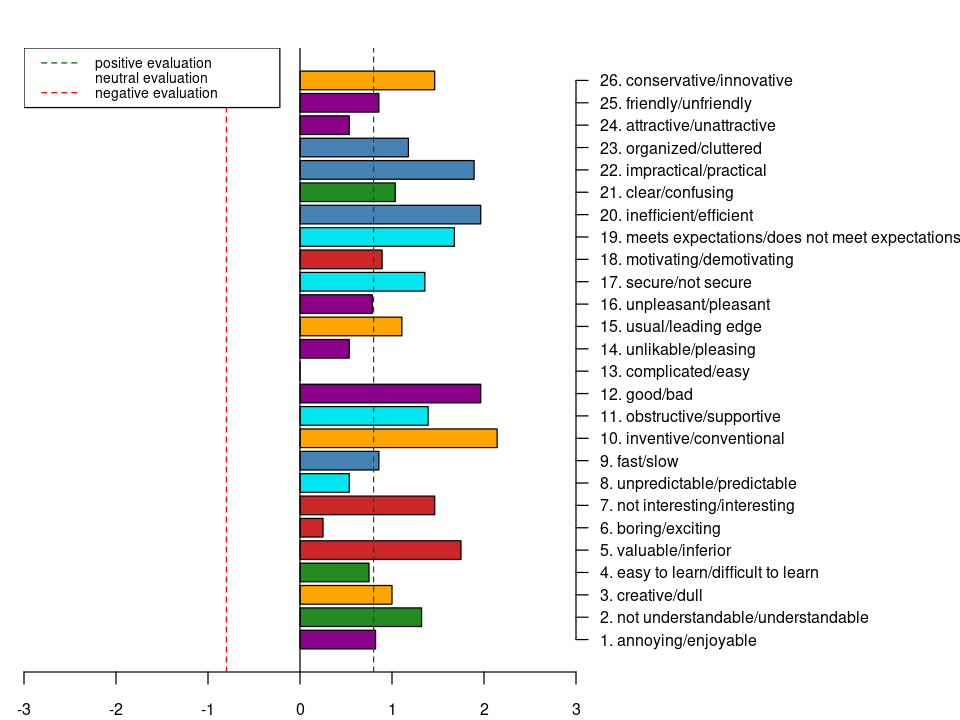

In [12]:
## plot of item means
options(repr.plot.width=8, repr.plot.height=6)
plot_items(rescaled_data = DT)

## Analysis of dimensions

### Numerical summary

In [13]:
## means per person
tab <- means_person(rescaled_data = DT)
tab

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00
1.0000000,1.75,1.75,1.25,0.50,2.00
1.1666667,0.50,1.50,1.00,1.25,1.25
1.8333333,0.75,2.00,1.75,2.00,2.00
1.8333333,0.50,1.00,2.00,2.25,2.50
1.6666667,1.00,2.75,0.75,1.50,1.25
1.0000000,0.50,0.75,0.75,0.75,1.00
1.1666667,0.75,1.00,0.50,1.00,1.25
2.0000000,1.50,2.25,1.75,2.75,2.50


In [14]:
#write_xlsx(x = tab, 'dimensions.xlsx')

In [15]:
## mean, standard deviaton and variance for each dimension
dim_means <- dimensions_mean(data = tab, weights = weights)
dim_means

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.9166667      0.7767857      1.4732143      1.2410714      1.0892857 
       Novelty 
     1.4285714

In [16]:
# standard deviation
dimensions_deviation(data = tab, weights = weights)

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     1.0097264      0.8642576      0.8958218      0.8565709      1.0567558 
       Novelty 
     0.7901510

In [17]:
# variance
dimensions_variance(data = tab, weights = weights)

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     1.0195473      0.7469411      0.8024967      0.7337136      1.1167328 
       Novelty 
     0.6243386

In [18]:
# standard error
dimensions_sderror(data = tab, weights = weights)

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.1908203      0.1633293      0.1692944      0.1618767      0.1997081 
       Novelty 
     0.1493245

In [19]:
## means for grouped dimensions
grouped_dimensions_mean(tab, weights = weights)

Attractiveness Pragmatic Quality   Hedonic Quality 
        0.9166667         1.1636905         1.2589286

### Vizualization and interpretation

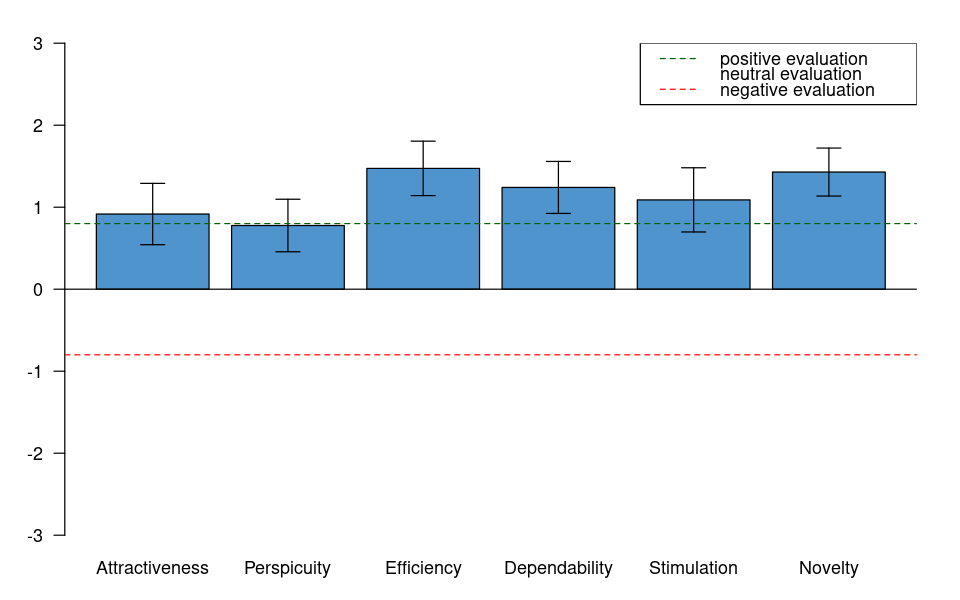

In [20]:
## plot by dimensions
options(repr.plot.width=8, repr.plot.height=5)
plot_dimensions(data = tab, weights = weights)

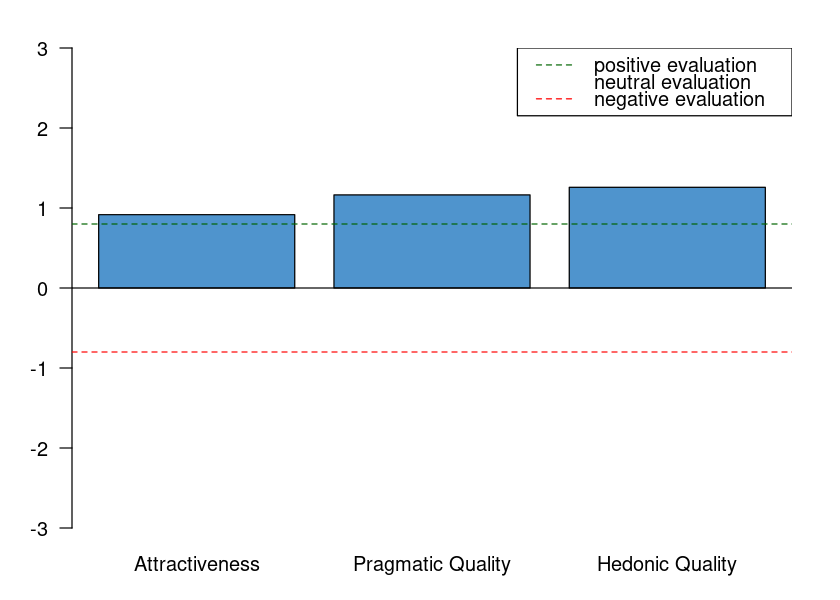

In [21]:
## plot by grouped dimensions
options(repr.plot.width=7, repr.plot.height=5)
plot_grouped_dimensions(tab, weights = weights)

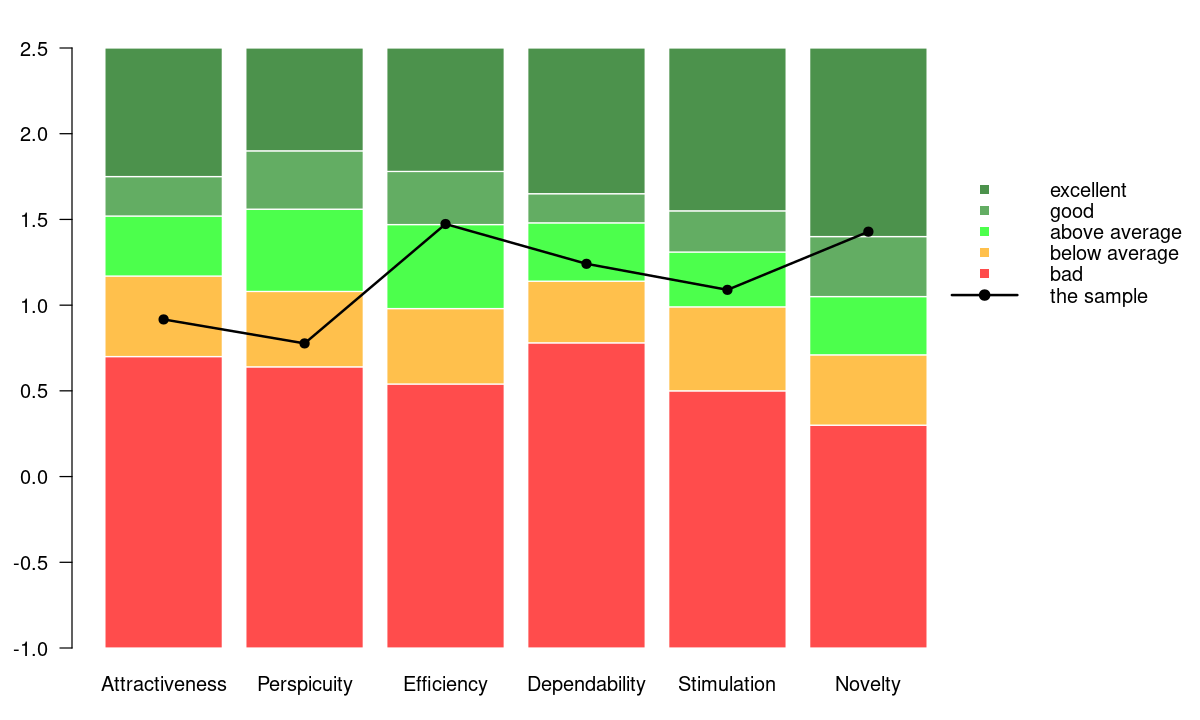

In [22]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab, weights = weights)

In [23]:
## interpretation of results
tabint <- interpretation(dim_means)
tabint

,Mean,benchmark,Interpretation
,<dbl>,<chr>,<chr>
Attractiveness,0.9166667,below average,"50% of results better, 25% of results worse"
Perspicuity,0.7767857,below average,"50% of results better, 25% of results worse"
Efficiency,1.4732143,good,"10% of results better, 75% of results worse"
Dependability,1.2410714,above average,"25% of results better, 50% of results worse"
Stimulation,1.0892857,above average,"25% of results better, 50% of results worse"
Novelty,1.4285714,excellent,In the range of the 10% best results


In [24]:
# latex code
latex(tabint, file="")

%latex.default(tabint, file = "")%
\begin{table}[!tbp]
\begin{center}
\begin{tabular}{lrll}
\hline\hline
\multicolumn{1}{l}{tabint}&\multicolumn{1}{c}{Mean}&\multicolumn{1}{c}{benchmark}&\multicolumn{1}{c}{Interpretation}\tabularnewline
\hline
Attractiveness&$0.916666666666667$&below average&50\% of results better, 25\% of results worse\tabularnewline
Perspicuity&$0.776785714285714$&below average&50\% of results better, 25\% of results worse\tabularnewline
Efficiency&$1.473214285714286$&good&10\% of results better, 75\% of results worse\tabularnewline
Dependability&$1.241071428571429$&above average&25\% of results better, 50\% of results worse\tabularnewline
Stimulation&$1.089285714285714$&above average&25\% of results better, 50\% of results worse\tabularnewline
Novelty&$1.428571428571429$&excellent&In the range of the 10\% best results\tabularnewline
\hline
\end{tabular}\end{center}
\end{table}


# Benchmark plots by different factors

In [25]:
dUEQ

ID,gender,year,study,achiever,city,study field,preFCI,math grade,UEQ1,⋯,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,understanding,improvement,transfer
<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Pingu,M,2017,Math-Phys,high,50000-99999,Math-Phys,0.60000000,1,7,⋯,5,5,6,5,4,3,5,disagree,agree,disagree
Cogito,F,2017,Phys,high,100000+,Phys-Bio,0.46666667,1,5,⋯,6,2,6,3,3,3,6,agree,agree,agree
Brachyblast,M,2017,Phys,high,0-9999,Phys-Bio,0.26666667,1,5,⋯,6,3,6,3,2,3,6,agree,strongly agree,agree
naxyz801me,F,2017,Math-Phys,high,0-9999,Math-Phys,0.40000000,1,6,⋯,6,2,7,2,3,3,6,strongly agree,strongly agree,agree
sova,M,2017,Math-Phys,high,100000+,Math-Phys,0.53333333,1,6,⋯,6,3,5,3,3,2,7,strongly agree,strongly agree,strongly agree
Fidlibum,M,2017,Math-Phys,low,50000-99999,Math-Phys,0.30000000,1,6,⋯,6,3,7,1,2,3,4,neutral,strongly agree,neutral
Dolan,M,2017,Phys,low,20000-49999,Phys-Bio,0.23333333,2,6,⋯,5,3,5,3,3,5,4,agree,agree,agree
Skywalker,M,2017,Math-Phys,high,10000-19999,Math-Phys,0.73333333,1,4,⋯,6,2,5,2,2,2,6,strongly agree,strongly agree,strongly agree
Moss,M,2017,Phys,high,50000-99999,Phys-Chem,0.83333333,2,4,⋯,6,4,6,2,2,1,6,strongly agree,agree,strongly agree


## Benchmark plot : Math-Phys, Phys

In [26]:
dstudy <- data
dstudy$group <- dUEQ$study
dstudy

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4,3,4,2,4,5,2,7,3,⋯,3,2,5,5,6,5,4,3,5,Math-Phys
5,6,2,2,2,4,4,5,2,2,⋯,4,3,6,2,6,3,3,3,6,Phys
5,5,4,3,2,5,6,4,3,2,⋯,4,3,6,3,6,3,2,3,6,Phys
6,6,2,3,1,5,7,5,3,2,⋯,3,2,6,2,7,2,3,3,6,Math-Phys
6,5,2,4,1,5,7,6,4,1,⋯,2,2,6,3,5,3,3,2,7,Math-Phys
6,5,4,2,2,5,6,5,1,1,⋯,3,2,6,3,7,1,2,3,4,Math-Phys
6,5,4,3,2,4,5,4,4,2,⋯,4,3,5,3,5,3,3,5,4,Phys
4,5,3,4,3,5,5,3,5,3,⋯,3,2,6,2,5,2,2,2,6,Math-Phys
4,7,1,3,1,6,7,5,1,1,⋯,1,1,6,4,6,2,2,1,6,Phys


In [27]:
## rescale data
DT_study <- rescale_data(data = dstudy)
## calculate means for each dimension
tab_study <- means_person(rescaled_data = DT_study, grouping = TRUE)
tab_study

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,Math-Phys
1.0000000,1.75,1.75,1.25,0.50,2.00,Phys
1.1666667,0.50,1.50,1.00,1.25,1.25,Phys
1.8333333,0.75,2.00,1.75,2.00,2.00,Math-Phys
1.8333333,0.50,1.00,2.00,2.25,2.50,Math-Phys
1.6666667,1.00,2.75,0.75,1.50,1.25,Math-Phys
1.0000000,0.50,0.75,0.75,0.75,1.00,Phys
1.1666667,0.75,1.00,0.50,1.00,1.25,Math-Phys
2.0000000,1.50,2.25,1.75,2.75,2.50,Phys


In [28]:
dimensions_mean(data = tab_study, grouping = TRUE, weights = weights)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Math-Phys,1.1777778,0.9000000,1.683333,1.350000,1.4166667,1.566667
Phys,0.6153846,0.6346154,1.230769,1.115385,0.7115385,1.269231


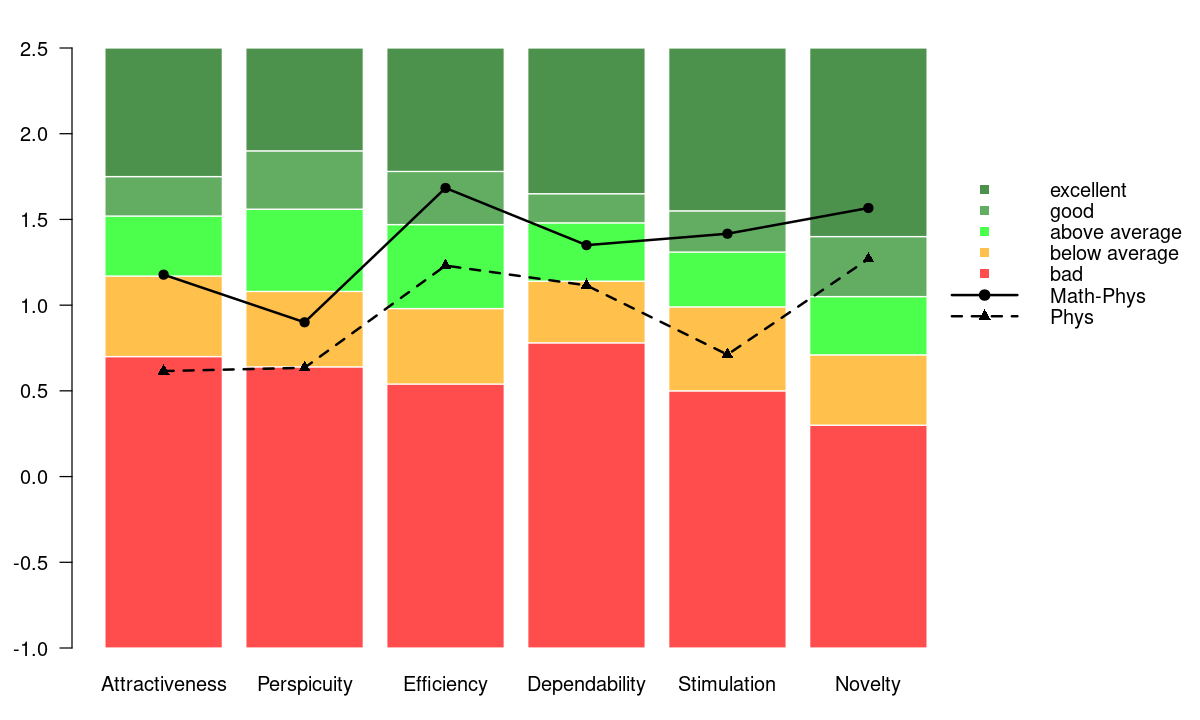

In [29]:
## function to create a plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_study, grouping = TRUE, weights = weights)

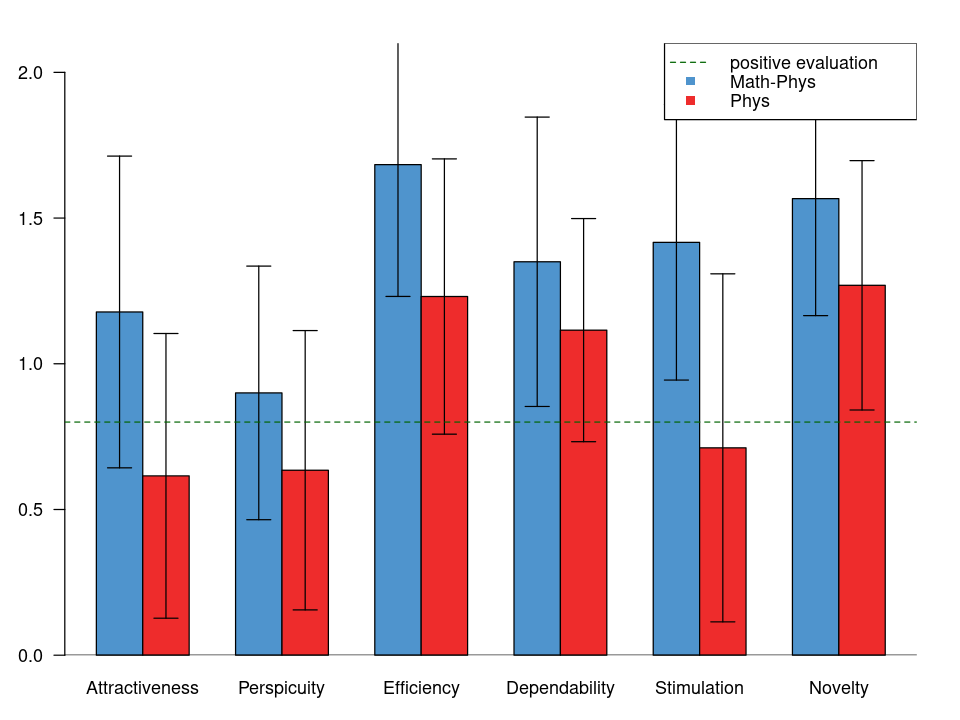

In [30]:
## plot by dimensions
options(repr.plot.width=8, repr.plot.height=6)
plot_dimensions(tab_study, grouping = TRUE, weights = weights)

In [31]:
# adding all together 
tab$group<-'all'
tab_all <- rbind(tab, tab_study)
tab_all
tab_all$group<-as.factor(tab_all$group)
str(tab_all)

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,all
1.0000000,1.75,1.75,1.25,0.50,2.00,all
1.1666667,0.50,1.50,1.00,1.25,1.25,all
1.8333333,0.75,2.00,1.75,2.00,2.00,all
1.8333333,0.50,1.00,2.00,2.25,2.50,all
1.6666667,1.00,2.75,0.75,1.50,1.25,all
1.0000000,0.50,0.75,0.75,0.75,1.00,all
1.1666667,0.75,1.00,0.50,1.00,1.25,all
2.0000000,1.50,2.25,1.75,2.75,2.50,all


'data.frame':	56 obs. of  7 variables:
 $ Attractiveness: num  1 1 1.17 1.83 1.83 ...
 $ Perspicuity   : num  -0.25 1.75 0.5 0.75 0.5 1 0.5 0.75 1.5 1.25 ...
 $ Efficiency    : num  -0.25 1.75 1.5 2 1 2.75 0.75 1 2.25 2.25 ...
 $ Dependability : num  -0.5 1.25 1 1.75 2 0.75 0.75 0.5 1.75 2 ...
 $ Stimulation   : num  1 0.5 1.25 2 2.25 1.5 0.75 1 2.75 1.75 ...
 $ Novelty       : num  1 2 1.25 2 2.5 1.25 1 1.25 2.5 1.5 ...
 $ group         : Factor w/ 3 levels "all","Math-Phys",..: 1 1 1 1 1 1 1 1 1 1 ...


In [32]:
n <- dim(tab_all)[1]
weights_all<-rep(1,n)

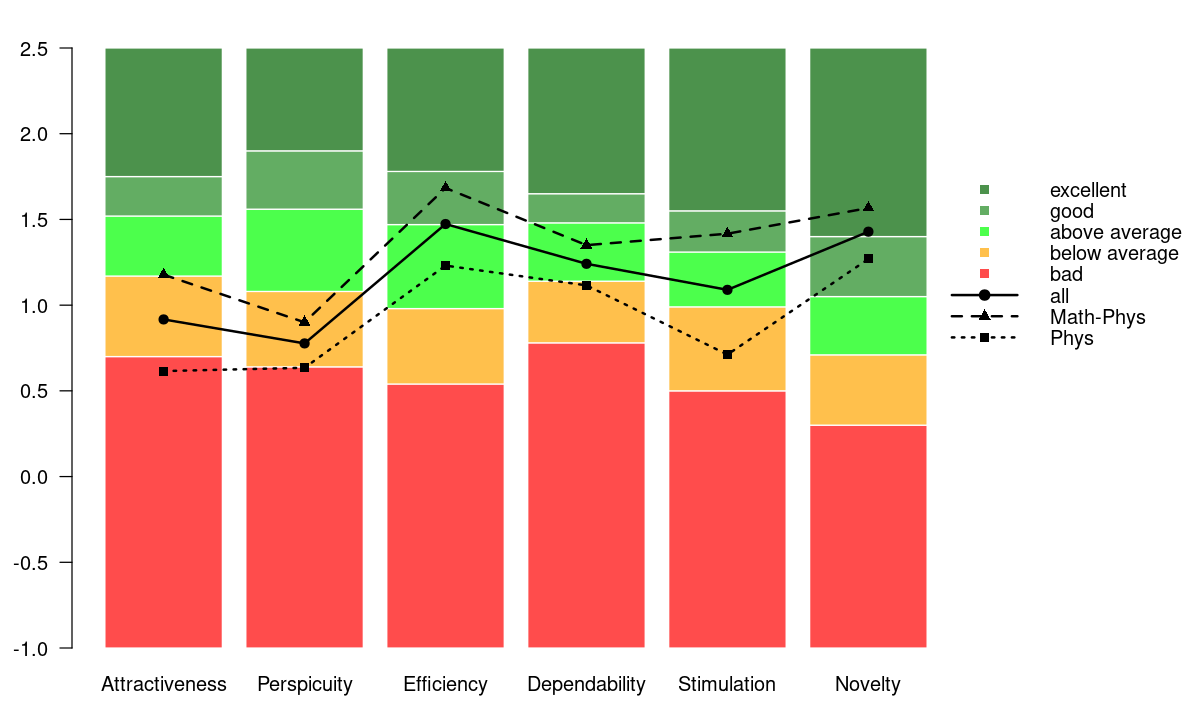

In [33]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_all, grouping = TRUE, weights = weights_all, lty = c(1,2,3))

## Benchmark plot: years

In [34]:
data_years <- data
data_years$group <- dUEQ$year
data_years

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4,3,4,2,4,5,2,7,3,⋯,3,2,5,5,6,5,4,3,5,2017
5,6,2,2,2,4,4,5,2,2,⋯,4,3,6,2,6,3,3,3,6,2017
5,5,4,3,2,5,6,4,3,2,⋯,4,3,6,3,6,3,2,3,6,2017
6,6,2,3,1,5,7,5,3,2,⋯,3,2,6,2,7,2,3,3,6,2017
6,5,2,4,1,5,7,6,4,1,⋯,2,2,6,3,5,3,3,2,7,2017
6,5,4,2,2,5,6,5,1,1,⋯,3,2,6,3,7,1,2,3,4,2017
6,5,4,3,2,4,5,4,4,2,⋯,4,3,5,3,5,3,3,5,4,2017
4,5,3,4,3,5,5,3,5,3,⋯,3,2,6,2,5,2,2,2,6,2017
4,7,1,3,1,6,7,5,1,1,⋯,1,1,6,4,6,2,2,1,6,2017


In [35]:
## rescale data
DT_years <- rescale_data(data = data_years)
## calculate means for each dimension
tab_years <- means_person(rescaled_data = DT_years, grouping = TRUE)

In [36]:
dimensions_mean(data = tab_years, grouping = TRUE, weights = weights)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017,1.1805556,0.8125000,1.312500,1.083333,1.145833,1.458333
2018,0.8703704,0.6388889,1.388889,1.305556,1.000000,1.388889
2019,0.5238095,0.8928571,1.857143,1.428571,1.107143,1.428571


In [37]:
# add all years summaries
tab_years

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,2017
1.0000000,1.75,1.75,1.25,0.50,2.00,2017
1.1666667,0.50,1.50,1.00,1.25,1.25,2017
1.8333333,0.75,2.00,1.75,2.00,2.00,2017
1.8333333,0.50,1.00,2.00,2.25,2.50,2017
1.6666667,1.00,2.75,0.75,1.50,1.25,2017
1.0000000,0.50,0.75,0.75,0.75,1.00,2017
1.1666667,0.75,1.00,0.50,1.00,1.25,2017
2.0000000,1.50,2.25,1.75,2.75,2.50,2017


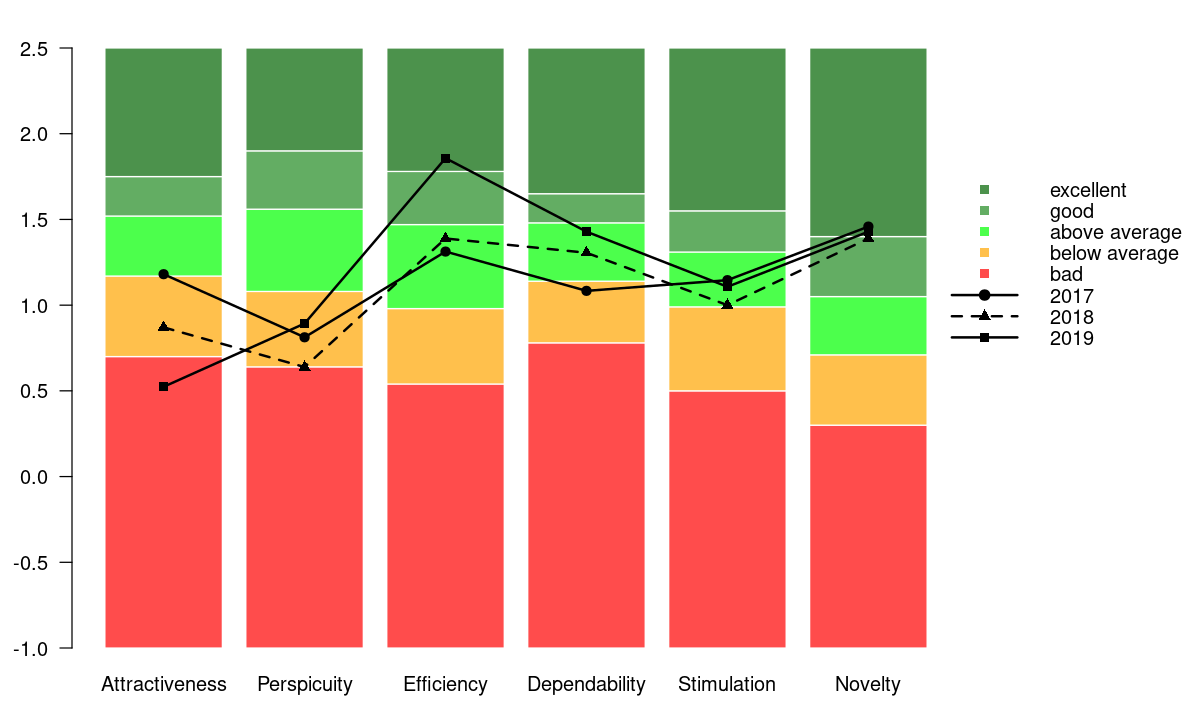

In [38]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_years, grouping = TRUE, weights = weights)

In [39]:
# adding all years 
tab$group<-'all years'
tab_all <- rbind(tab, tab_years)
tab_all
tab_all$group<-as.factor(tab_all$group)
str(tab_all)

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,all years
1.0000000,1.75,1.75,1.25,0.50,2.00,all years
1.1666667,0.50,1.50,1.00,1.25,1.25,all years
1.8333333,0.75,2.00,1.75,2.00,2.00,all years
1.8333333,0.50,1.00,2.00,2.25,2.50,all years
1.6666667,1.00,2.75,0.75,1.50,1.25,all years
1.0000000,0.50,0.75,0.75,0.75,1.00,all years
1.1666667,0.75,1.00,0.50,1.00,1.25,all years
2.0000000,1.50,2.25,1.75,2.75,2.50,all years


'data.frame':	56 obs. of  7 variables:
 $ Attractiveness: num  1 1 1.17 1.83 1.83 ...
 $ Perspicuity   : num  -0.25 1.75 0.5 0.75 0.5 1 0.5 0.75 1.5 1.25 ...
 $ Efficiency    : num  -0.25 1.75 1.5 2 1 2.75 0.75 1 2.25 2.25 ...
 $ Dependability : num  -0.5 1.25 1 1.75 2 0.75 0.75 0.5 1.75 2 ...
 $ Stimulation   : num  1 0.5 1.25 2 2.25 1.5 0.75 1 2.75 1.75 ...
 $ Novelty       : num  1 2 1.25 2 2.5 1.25 1 1.25 2.5 1.5 ...
 $ group         : Factor w/ 4 levels "2017","2018",..: 4 4 4 4 4 4 4 4 4 4 ...


In [40]:
dimensions_mean(tab_all, grouping=TRUE, weights=c(weights,weights))

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017,1.1805556,0.8125000,1.312500,1.083333,1.145833,1.458333
2018,0.8703704,0.6388889,1.388889,1.305556,1.000000,1.388889
2019,0.5238095,0.8928571,1.857143,1.428571,1.107143,1.428571
all years,0.9166667,0.7767857,1.473214,1.241071,1.089286,1.428571


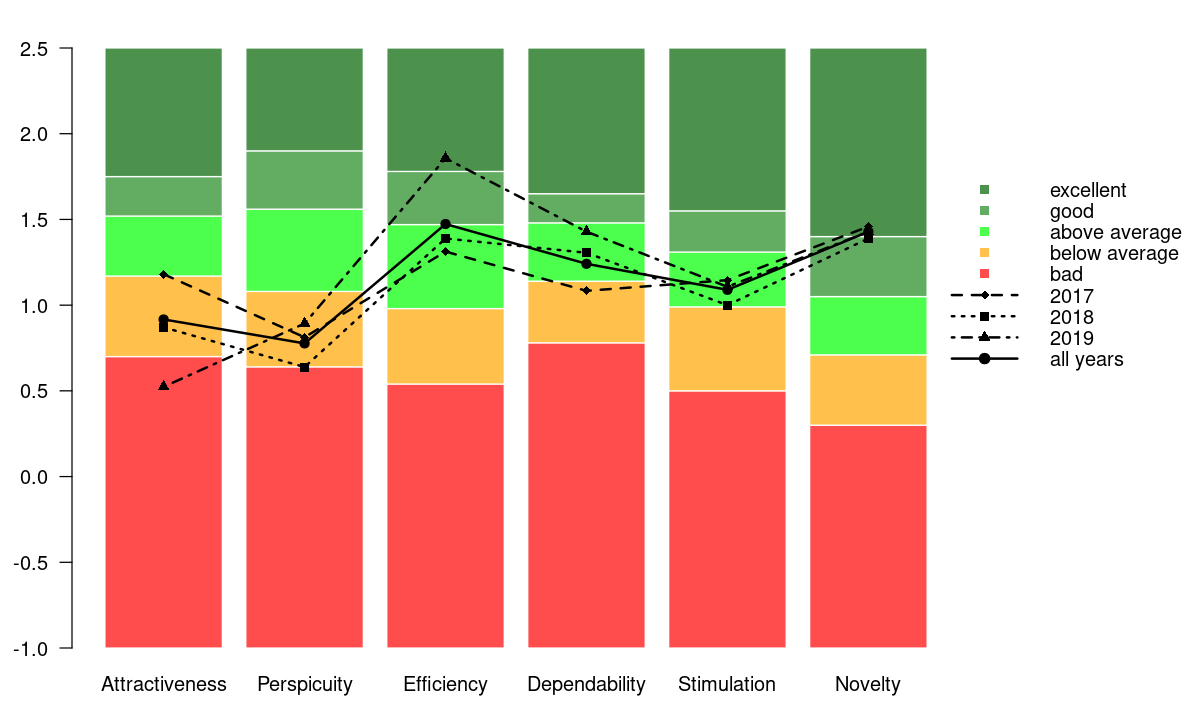

In [41]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_all, grouping = TRUE, weights = weights_all, lty = c(2,3,4,1), pch = c(18,15,17,19) )

## Benchmark plot : gender

In [42]:
dgen <- data
dgen$group <- dUEQ$gender
dgen

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4,3,4,2,4,5,2,7,3,⋯,3,2,5,5,6,5,4,3,5,M
5,6,2,2,2,4,4,5,2,2,⋯,4,3,6,2,6,3,3,3,6,F
5,5,4,3,2,5,6,4,3,2,⋯,4,3,6,3,6,3,2,3,6,M
6,6,2,3,1,5,7,5,3,2,⋯,3,2,6,2,7,2,3,3,6,F
6,5,2,4,1,5,7,6,4,1,⋯,2,2,6,3,5,3,3,2,7,M
6,5,4,2,2,5,6,5,1,1,⋯,3,2,6,3,7,1,2,3,4,M
6,5,4,3,2,4,5,4,4,2,⋯,4,3,5,3,5,3,3,5,4,M
4,5,3,4,3,5,5,3,5,3,⋯,3,2,6,2,5,2,2,2,6,M
4,7,1,3,1,6,7,5,1,1,⋯,1,1,6,4,6,2,2,1,6,M


In [43]:
## rescale data
DT_gen <- rescale_data(data = dgen)
## calculate means for each dimension
tab_gen <- means_person(rescaled_data = DT_gen, grouping = TRUE)
tab_gen

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,M
1.0000000,1.75,1.75,1.25,0.50,2.00,F
1.1666667,0.50,1.50,1.00,1.25,1.25,M
1.8333333,0.75,2.00,1.75,2.00,2.00,F
1.8333333,0.50,1.00,2.00,2.25,2.50,M
1.6666667,1.00,2.75,0.75,1.50,1.25,M
1.0000000,0.50,0.75,0.75,0.75,1.00,M
1.1666667,0.75,1.00,0.50,1.00,1.25,M
2.0000000,1.50,2.25,1.75,2.75,2.50,M


In [44]:
dimensions_mean(data = tab_gen, grouping = TRUE, weights = weights)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.6785714,0.6785714,1.428571,1.178571,0.8035714,1.071429
M,1.1547619,0.8750000,1.517857,1.303571,1.3750000,1.785714


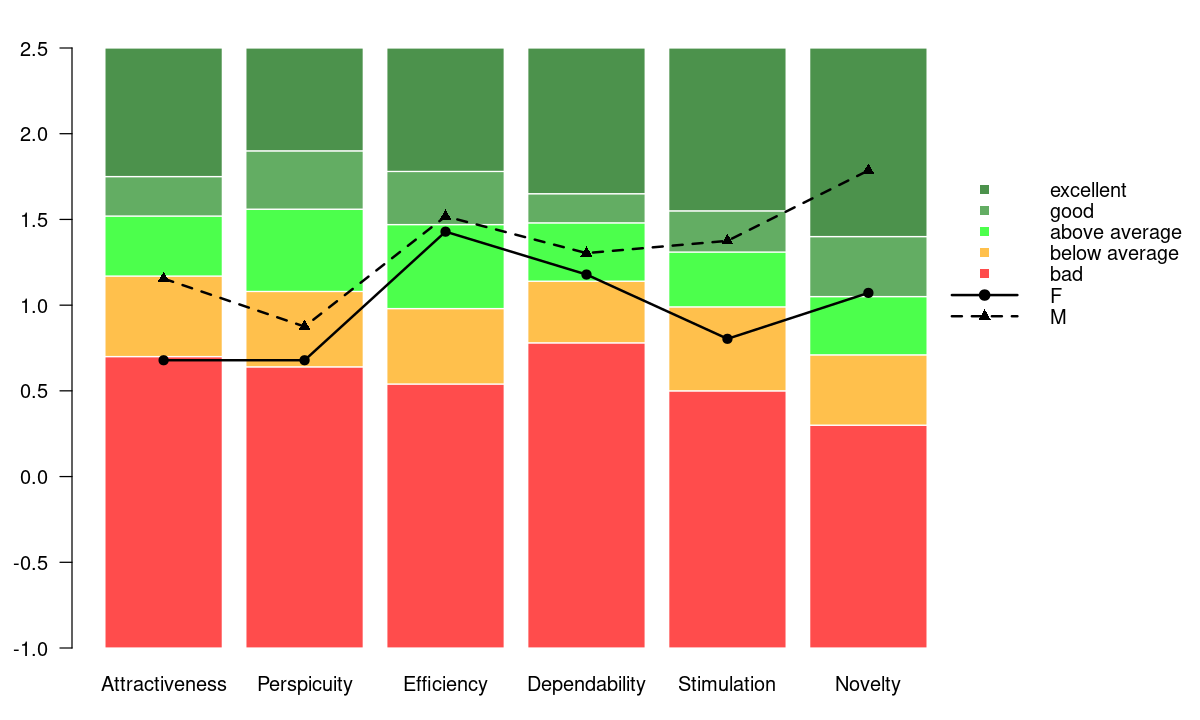

In [45]:
## function to create a plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_gen, grouping = TRUE, weights = weights)

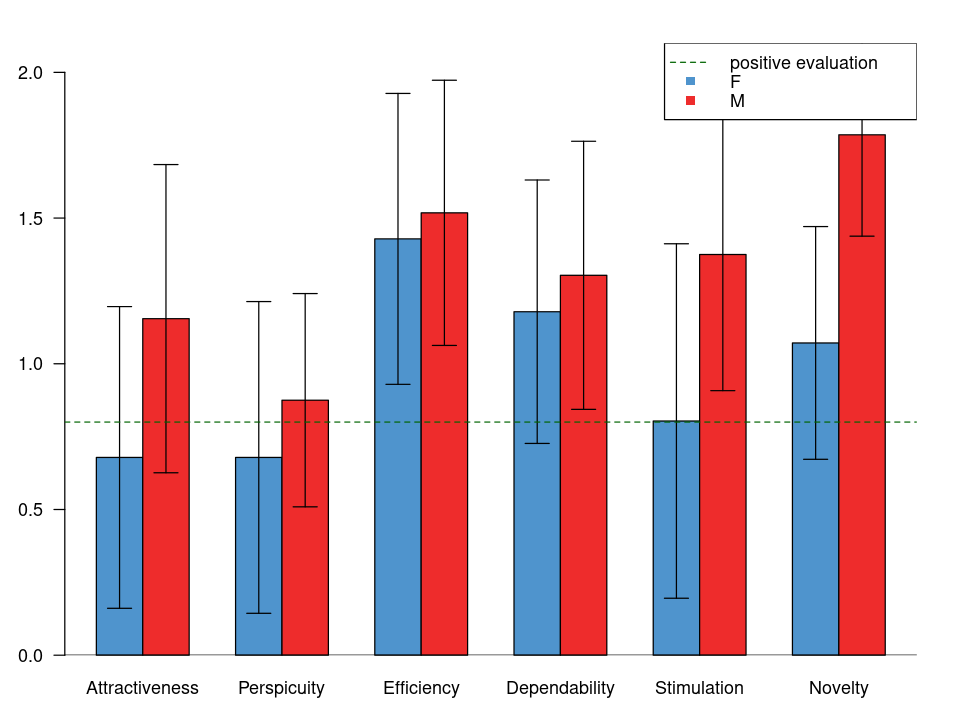

In [46]:
## plot by dimensions
options(repr.plot.width=8, repr.plot.height=6)
plot_dimensions(tab_gen, grouping = TRUE, weights = weights)

In [47]:
# adding all together 
tab$group<-'all'
tab_all <- rbind(tab, tab_gen)
tab_all
tab_all$group<-as.factor(tab_all$group)
str(tab_all)

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,all
1.0000000,1.75,1.75,1.25,0.50,2.00,all
1.1666667,0.50,1.50,1.00,1.25,1.25,all
1.8333333,0.75,2.00,1.75,2.00,2.00,all
1.8333333,0.50,1.00,2.00,2.25,2.50,all
1.6666667,1.00,2.75,0.75,1.50,1.25,all
1.0000000,0.50,0.75,0.75,0.75,1.00,all
1.1666667,0.75,1.00,0.50,1.00,1.25,all
2.0000000,1.50,2.25,1.75,2.75,2.50,all


'data.frame':	56 obs. of  7 variables:
 $ Attractiveness: num  1 1 1.17 1.83 1.83 ...
 $ Perspicuity   : num  -0.25 1.75 0.5 0.75 0.5 1 0.5 0.75 1.5 1.25 ...
 $ Efficiency    : num  -0.25 1.75 1.5 2 1 2.75 0.75 1 2.25 2.25 ...
 $ Dependability : num  -0.5 1.25 1 1.75 2 0.75 0.75 0.5 1.75 2 ...
 $ Stimulation   : num  1 0.5 1.25 2 2.25 1.5 0.75 1 2.75 1.75 ...
 $ Novelty       : num  1 2 1.25 2 2.5 1.25 1 1.25 2.5 1.5 ...
 $ group         : Factor w/ 3 levels "all","F","M": 1 1 1 1 1 1 1 1 1 1 ...


In [48]:
n <- dim(tab_all)[1]
weights_all<-rep(1,n)

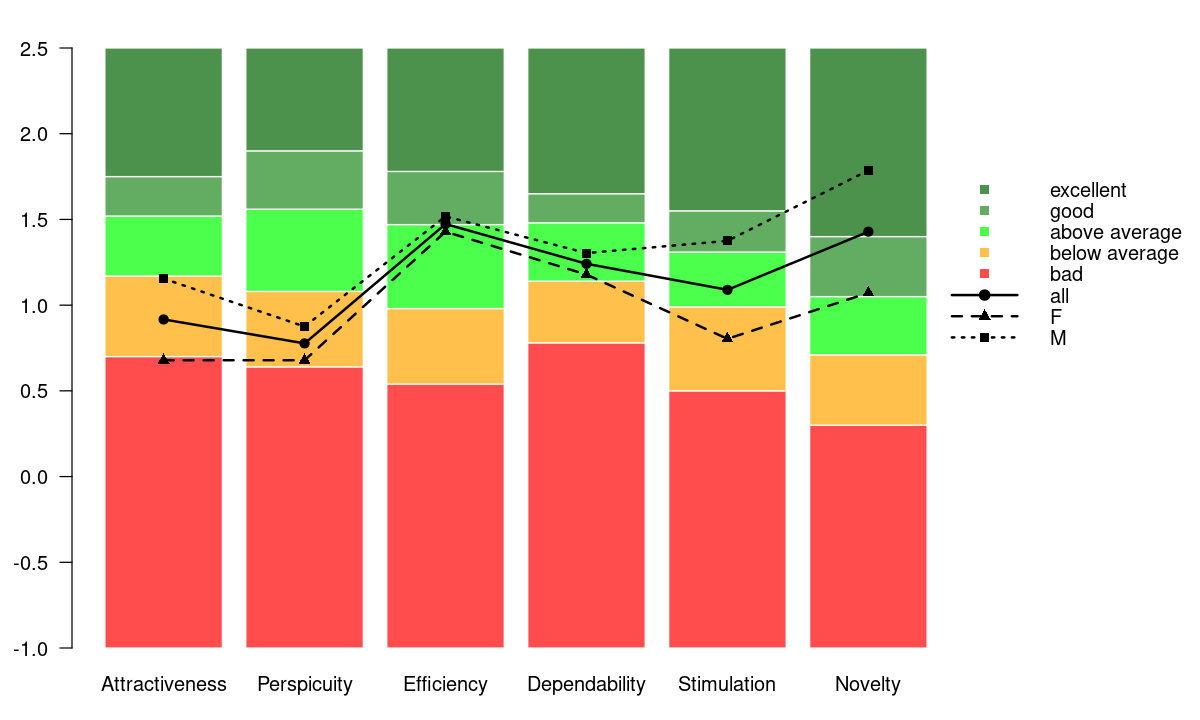

In [49]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_all, grouping = TRUE, weights = weights_all, lty = c(1,2,3))

## Benchmark plot: low and high achiever

In [50]:
dach <- data
dach$group <- dUEQ$achiever
dach

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4,3,4,2,4,5,2,7,3,⋯,3,2,5,5,6,5,4,3,5,high
5,6,2,2,2,4,4,5,2,2,⋯,4,3,6,2,6,3,3,3,6,high
5,5,4,3,2,5,6,4,3,2,⋯,4,3,6,3,6,3,2,3,6,high
6,6,2,3,1,5,7,5,3,2,⋯,3,2,6,2,7,2,3,3,6,high
6,5,2,4,1,5,7,6,4,1,⋯,2,2,6,3,5,3,3,2,7,high
6,5,4,2,2,5,6,5,1,1,⋯,3,2,6,3,7,1,2,3,4,low
6,5,4,3,2,4,5,4,4,2,⋯,4,3,5,3,5,3,3,5,4,low
4,5,3,4,3,5,5,3,5,3,⋯,3,2,6,2,5,2,2,2,6,high
4,7,1,3,1,6,7,5,1,1,⋯,1,1,6,4,6,2,2,1,6,high


In [51]:
## rescale data
DT_ach <- rescale_data(data = dach)
## calculate means for each dimension
tab_ach <- means_person(rescaled_data = DT_ach, grouping = TRUE)
tab_ach

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,high
1.0000000,1.75,1.75,1.25,0.50,2.00,high
1.1666667,0.50,1.50,1.00,1.25,1.25,high
1.8333333,0.75,2.00,1.75,2.00,2.00,high
1.8333333,0.50,1.00,2.00,2.25,2.50,high
1.6666667,1.00,2.75,0.75,1.50,1.25,low
1.0000000,0.50,0.75,0.75,0.75,1.00,low
1.1666667,0.75,1.00,0.50,1.00,1.25,high
2.0000000,1.50,2.25,1.75,2.75,2.50,high


In [52]:
dimensions_mean(data = tab_ach, grouping = TRUE, weights = weights)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high,1.380952,1.1071429,1.642857,1.303571,1.5714286,1.785714
low,0.452381,0.4464286,1.303571,1.178571,0.6071429,1.071429


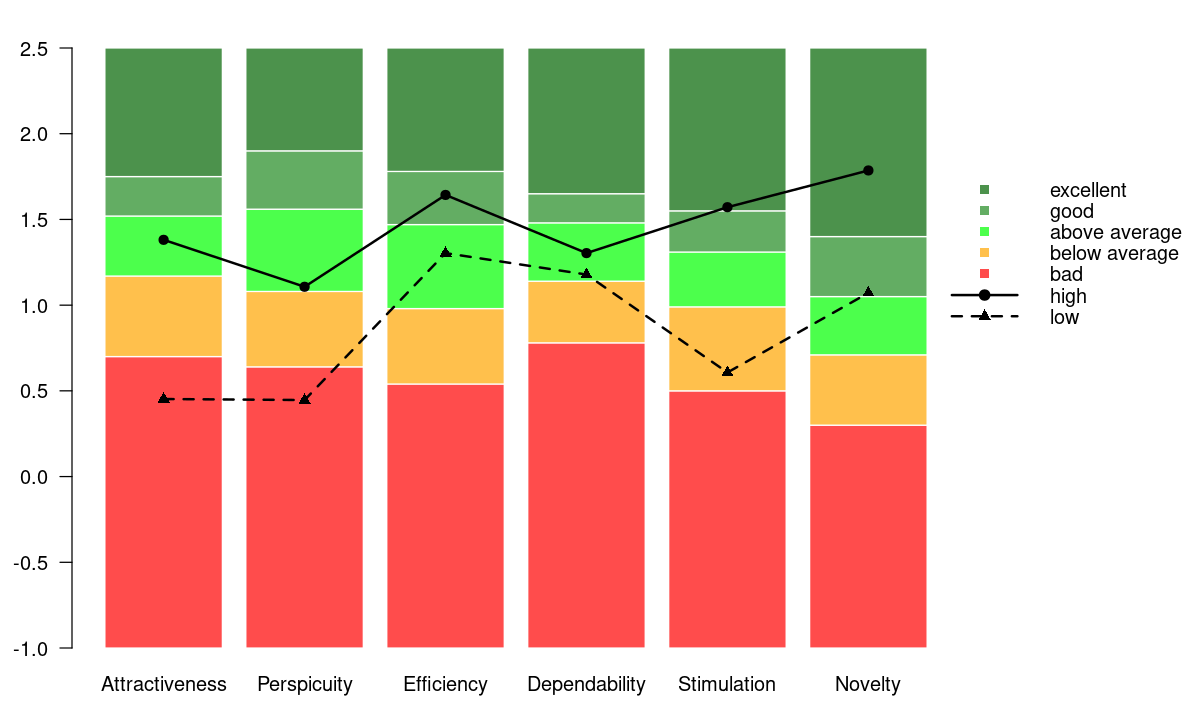

In [53]:
## function to create a plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_ach, grouping = TRUE, weights = weights)

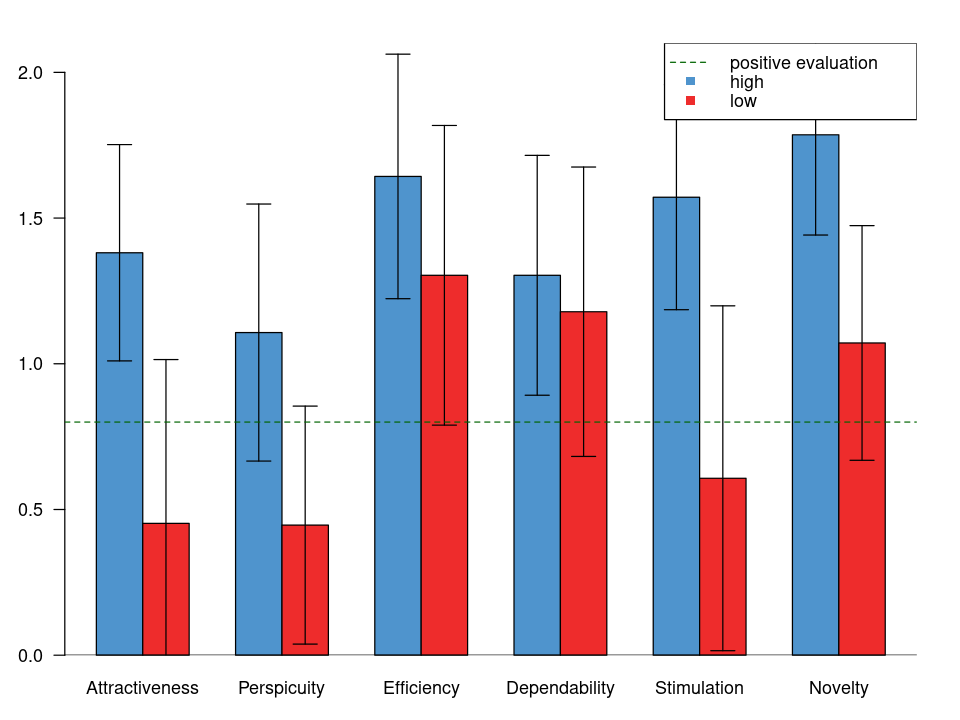

In [54]:
## plot by dimensions
options(repr.plot.width=8, repr.plot.height=6)
plot_dimensions(tab_ach, grouping = TRUE, weights = weights)

In [55]:
# adding all together 
tab$group<-'all'
tab_all <- rbind(tab, tab_ach)
tab_all
tab_all$group<-as.factor(tab_all$group)
str(tab_all)

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,all
1.0000000,1.75,1.75,1.25,0.50,2.00,all
1.1666667,0.50,1.50,1.00,1.25,1.25,all
1.8333333,0.75,2.00,1.75,2.00,2.00,all
1.8333333,0.50,1.00,2.00,2.25,2.50,all
1.6666667,1.00,2.75,0.75,1.50,1.25,all
1.0000000,0.50,0.75,0.75,0.75,1.00,all
1.1666667,0.75,1.00,0.50,1.00,1.25,all
2.0000000,1.50,2.25,1.75,2.75,2.50,all


'data.frame':	56 obs. of  7 variables:
 $ Attractiveness: num  1 1 1.17 1.83 1.83 ...
 $ Perspicuity   : num  -0.25 1.75 0.5 0.75 0.5 1 0.5 0.75 1.5 1.25 ...
 $ Efficiency    : num  -0.25 1.75 1.5 2 1 2.75 0.75 1 2.25 2.25 ...
 $ Dependability : num  -0.5 1.25 1 1.75 2 0.75 0.75 0.5 1.75 2 ...
 $ Stimulation   : num  1 0.5 1.25 2 2.25 1.5 0.75 1 2.75 1.75 ...
 $ Novelty       : num  1 2 1.25 2 2.5 1.25 1 1.25 2.5 1.5 ...
 $ group         : Factor w/ 3 levels "all","high","low": 1 1 1 1 1 1 1 1 1 1 ...


In [56]:
n <- dim(tab_all)[1]
weights_all<-rep(1,n)

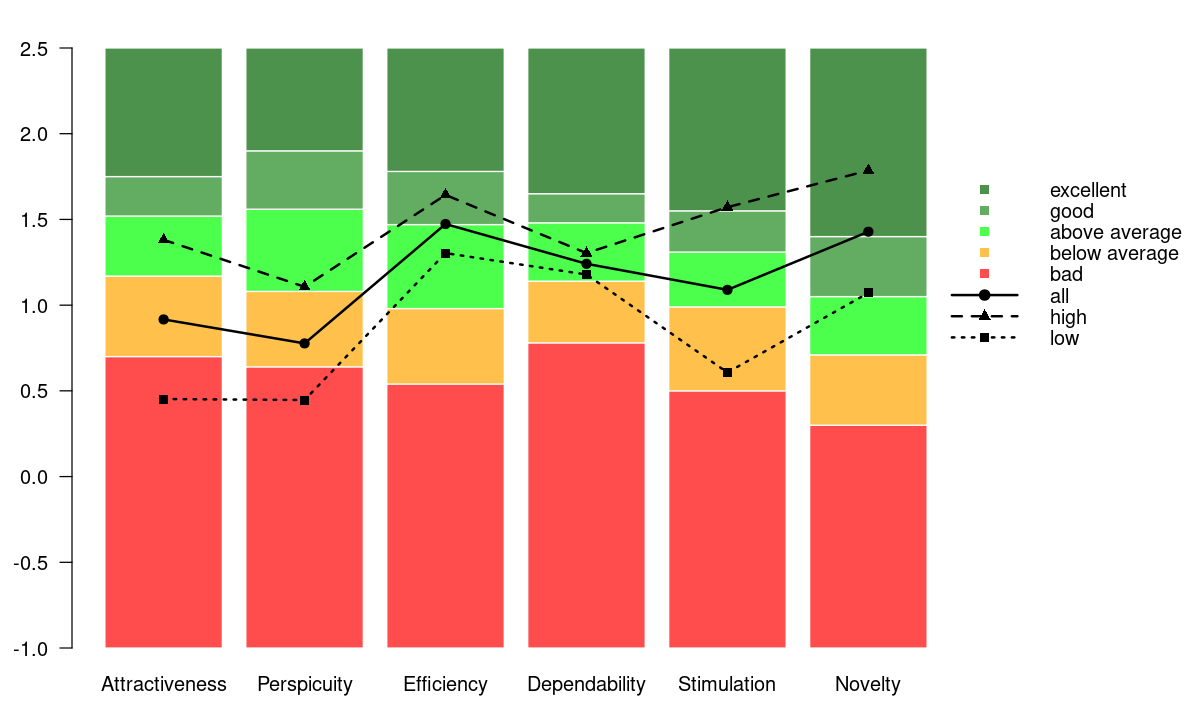

In [57]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_all, grouping = TRUE, weights = weights_all, lty = c(1,2,3))

# Consistency, inconsistency

## Reliability

In [58]:
## reliability
reliability(DT, spec = "whole")
reliability(DT, coef = "lambda")

[1] 0.9401104

Attractiveness    Perspicuity     Efficiency  Dependability    Stimulation 
     0.9038074      0.6869808      0.7033304      0.5503160      0.8409556 
       Novelty 
     0.7154724

In [59]:
## check data for inconstencies
inconsistencies(rescaled_data = DT, spec = "text")

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,critical?
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
no,no,yes,yes,no,no,suspicious
no,no,no,no,no,no,no
no,no,no,no,no,no,no
no,yes,no,no,no,no,no
no,no,no,no,no,no,no
no,no,no,yes,no,no,no
no,no,no,no,no,no,no
no,no,no,no,no,no,no
no,no,no,no,no,no,no


In [60]:
## which responces are suggested to be deleted
remove_rows <- inconsistencies(rescaled_data = DT, spec = "remove")
remove_rows

[1]  1 14 15 16 17 20 22

In [61]:
## if we want we can remove suspicious responces - just delete "#" sign in the row below
#DT <- DT[-remove_rows,]; DT
#weights <- weights[-remove_rows]; weights

## Benchmark plot : consistant data / inconsistant data

In [62]:
inconsistant <- inconsistencies(rescaled_data = DT, spec = "remove")

In [63]:
# consistant responses
dUEQ$inconsistant <- "consistant"
dUEQ$inconsistant[inconsistant] <- "inconsistant"
dUEQ$inconsistant <- factor(dUEQ$inconsistant)

In [64]:
data_inconsistant <- data
data_inconsistant$group <- dUEQ$inconsistant
data_inconsistant

UEQ1,UEQ2,UEQ3,UEQ4,UEQ5,UEQ6,UEQ7,UEQ8,UEQ9,UEQ10,⋯,UEQ18,UEQ19,UEQ20,UEQ21,UEQ22,UEQ23,UEQ24,UEQ25,UEQ26,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4,3,4,2,4,5,2,7,3,⋯,3,2,5,5,6,5,4,3,5,inconsistant
5,6,2,2,2,4,4,5,2,2,⋯,4,3,6,2,6,3,3,3,6,consistant
5,5,4,3,2,5,6,4,3,2,⋯,4,3,6,3,6,3,2,3,6,consistant
6,6,2,3,1,5,7,5,3,2,⋯,3,2,6,2,7,2,3,3,6,consistant
6,5,2,4,1,5,7,6,4,1,⋯,2,2,6,3,5,3,3,2,7,consistant
6,5,4,2,2,5,6,5,1,1,⋯,3,2,6,3,7,1,2,3,4,consistant
6,5,4,3,2,4,5,4,4,2,⋯,4,3,5,3,5,3,3,5,4,consistant
4,5,3,4,3,5,5,3,5,3,⋯,3,2,6,2,5,2,2,2,6,consistant
4,7,1,3,1,6,7,5,1,1,⋯,1,1,6,4,6,2,2,1,6,consistant


In [65]:
## rescale data
DT_cons <- rescale_data(data = data_inconsistant)
## calculate means for each dimension
tab_cons <- means_person(rescaled_data = DT_cons, grouping = TRUE)

In [66]:
dimensions_mean(data = tab_cons, grouping = TRUE, weights = weights)

group,Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
consistant,1.0317460,0.8571429,1.523810,1.238095,1.059524,1.404762
inconsistant,0.5714286,0.5357143,1.321429,1.250000,1.178571,1.500000


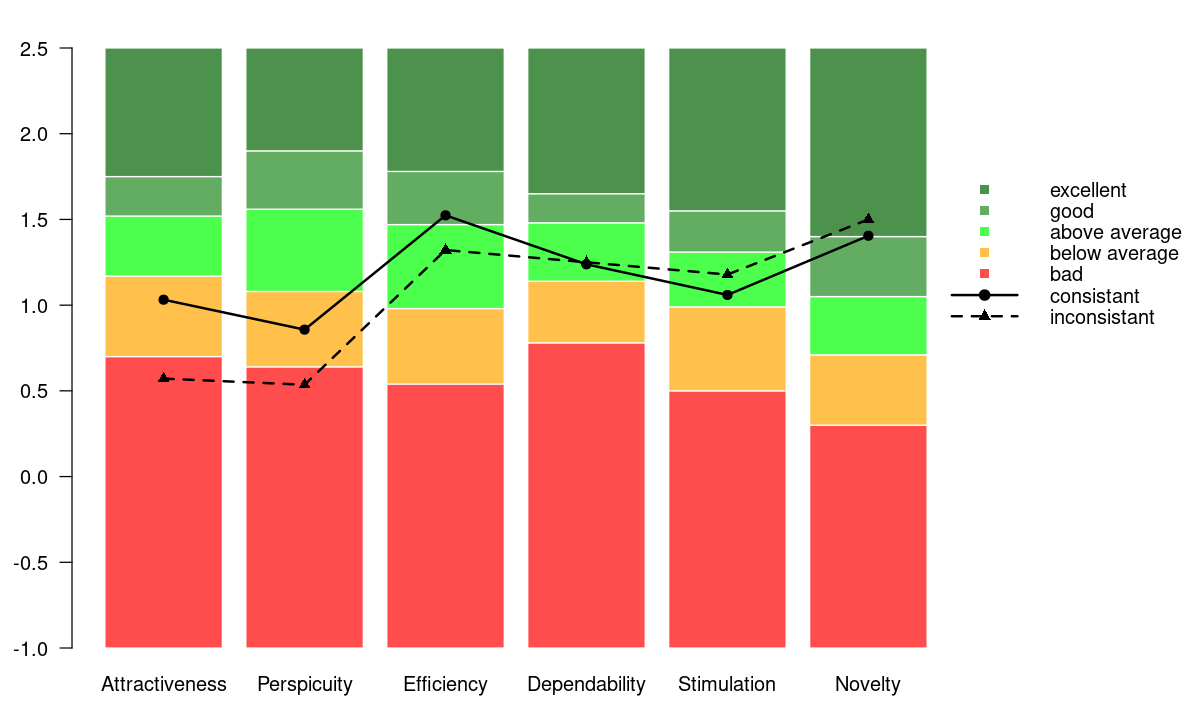

In [67]:
## function to create a plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_cons, grouping = TRUE, weights = weights)

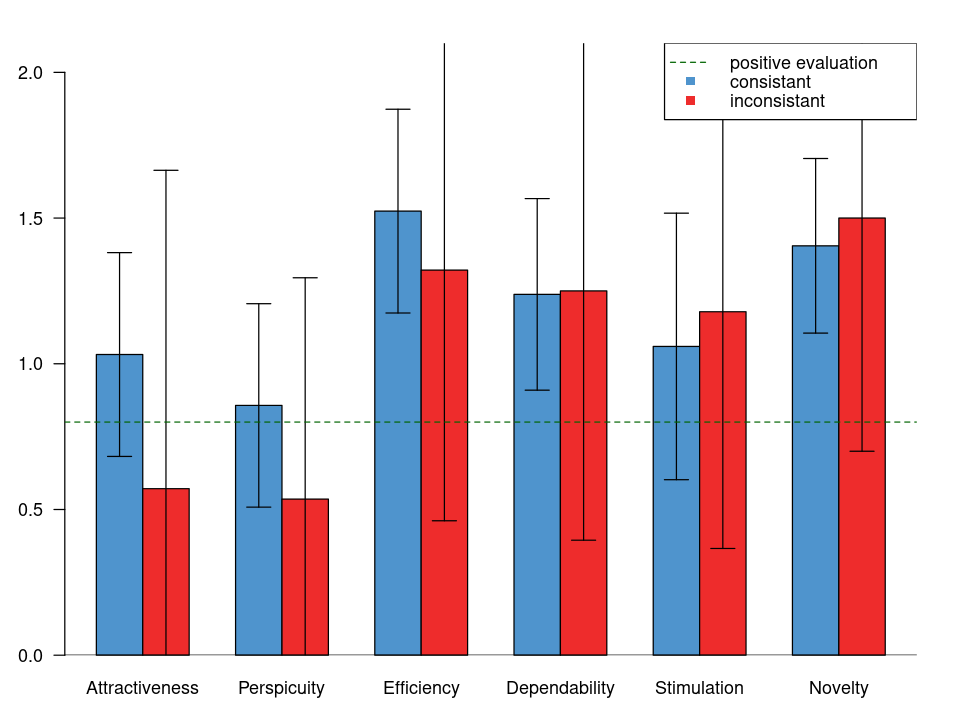

In [68]:
## plot by dimensions
options(repr.plot.width=8, repr.plot.height=6)
plot_dimensions(tab_cons, grouping = TRUE, weights = weights)

In [69]:
# adding all together 
tab$group<-'all'
tab_all <- rbind(tab, tab_cons)
tab_all
tab_all$group<-as.factor(tab_all$group)
str(tab_all)

Attractiveness,Perspicuity,Efficiency,Dependability,Stimulation,Novelty,group
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.0000000,-0.25,-0.25,-0.50,1.00,1.00,all
1.0000000,1.75,1.75,1.25,0.50,2.00,all
1.1666667,0.50,1.50,1.00,1.25,1.25,all
1.8333333,0.75,2.00,1.75,2.00,2.00,all
1.8333333,0.50,1.00,2.00,2.25,2.50,all
1.6666667,1.00,2.75,0.75,1.50,1.25,all
1.0000000,0.50,0.75,0.75,0.75,1.00,all
1.1666667,0.75,1.00,0.50,1.00,1.25,all
2.0000000,1.50,2.25,1.75,2.75,2.50,all


'data.frame':	56 obs. of  7 variables:
 $ Attractiveness: num  1 1 1.17 1.83 1.83 ...
 $ Perspicuity   : num  -0.25 1.75 0.5 0.75 0.5 1 0.5 0.75 1.5 1.25 ...
 $ Efficiency    : num  -0.25 1.75 1.5 2 1 2.75 0.75 1 2.25 2.25 ...
 $ Dependability : num  -0.5 1.25 1 1.75 2 0.75 0.75 0.5 1.75 2 ...
 $ Stimulation   : num  1 0.5 1.25 2 2.25 1.5 0.75 1 2.75 1.75 ...
 $ Novelty       : num  1 2 1.25 2 2.5 1.25 1 1.25 2.5 1.5 ...
 $ group         : Factor w/ 3 levels "all","consistant",..: 1 1 1 1 1 1 1 1 1 1 ...


In [70]:
n <- dim(tab_all)[1]
weights_all<-rep(1,n)

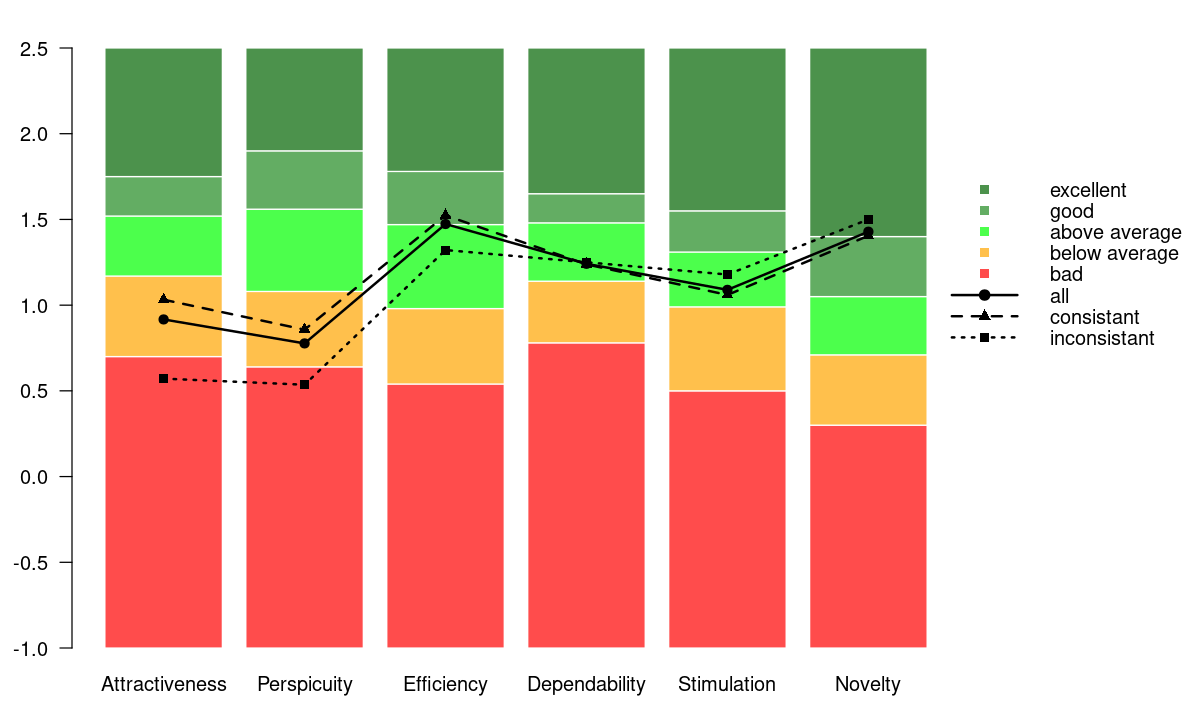

In [71]:
## plot with benchmarks
options(repr.plot.width=10, repr.plot.height=6)
plot_benchmarks(tab_all, grouping = TRUE, weights = weights_all, lty = c(1,2,3))